### Import Libraries
 

In [1]:
from scipy.io import loadmat #Scipy is a python library used for scientific computing and quite naturally, 
                             #they have a method which lets you read in .mat files.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
# load mill mat file
mat_data=loadmat("mill.mat")

### Data Profiling

In [3]:
print("Data is in form of",type(mat_data)) # so the mill_data into which contents of the mat file are loaded is of dictionary type.
print("Keys of dictionary",mat_data.keys()) # the data is inside the mill key

Data is in form of <class 'dict'>
Keys of dictionary dict_keys(['__header__', '__version__', '__globals__', 'mill'])


In [4]:
print("Mill data is in form of",type(mat_data['mill']))
mat_data['mill'].shape #so there are total 167 experimental runs 

Mill data is in form of <class 'numpy.ndarray'>


(1, 167)

In [5]:
mill_data=mat_data['mill']
mill_data.dtype # a structured datatype

dtype([('case', 'O'), ('run', 'O'), ('VB', 'O'), ('time', 'O'), ('DOC', 'O'), ('feed', 'O'), ('material', 'O'), ('smcAC', 'O'), ('smcDC', 'O'), ('vib_table', 'O'), ('vib_spindle', 'O'), ('AE_table', 'O'), ('AE_spindle', 'O')])

In [6]:
mill_data.dtype.names #to access the field names of a structured datatype use the names attribute of the dtype object

('case',
 'run',
 'VB',
 'time',
 'DOC',
 'feed',
 'material',
 'smcAC',
 'smcDC',
 'vib_table',
 'vib_spindle',
 'AE_table',
 'AE_spindle')

### Exploring for first experimental run 

In [7]:
mill_data.shape #a 2D array

(1, 167)

In [8]:
mill_data[0].shape #a 1D array

(167,)

In [9]:
mill_data[0,0]#this gives you the values for only the fields for first row out of total 167 rows.

(array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8), array([[2]], dtype=uint8), array([[1.5]]), array([[0.5]]), array([[1]], dtype=uint8), array([[-0.01708984],
       [ 0.26367188],
       [ 0.20751953],
       ...,
       [-0.80810547],
       [-0.73242188],
       [-0.57617188]]), array([[0.625     ],
       [0.81054688],
       [0.78125   ],
       ...,
       [1.38183594],
       [1.30371094],
       [1.52832031]]), array([[0.078125  ],
       [0.08544922],
       [0.078125  ],
       ...,
       [0.27587891],
       [0.52246094],
       [0.37841797]]), array([[0.31494141],
       [0.30151367],
       [0.30395508],
       ...,
       [0.3125    ],
       [0.31738281],
       [0.3112793 ]]), array([[0.08728027],
       [0.0982666 ],
       [0.09216309],
       ...,
       [0.10131836],
       [0.12756348],
       [0.12329102]]), array([[0.10375977],
       [0.12329102],
       [0.10498047],
       ...,
       [0.10681152],
       [0.11230469],
       [0

In [10]:
mill_data[0,0]['case'][0][0] #to access the values within the field

1

In [11]:
# Lets print what is what are the values of the fields for the first row
# First lets see the operating conditions
fields= mill_data.dtype.names
for field in fields[0:7]:
    print(f"Value of {field} is {mill_data[0,0][field][0][0]}")

#Lets see the shape of 6 sensors data:
for field in fields[7:]:
     print(f"Shape of {field} is {mill_data[0,0][field].shape}")

Value of case is 1
Value of run is 1
Value of VB is 0
Value of time is 2
Value of DOC is 1.5
Value of feed is 0.5
Value of material is 1
Shape of smcAC is (9000, 1)
Shape of smcDC is (9000, 1)
Shape of vib_table is (9000, 1)
Shape of vib_spindle is (9000, 1)
Shape of AE_table is (9000, 1)
Shape of AE_spindle is (9000, 1)


### Seeing the trend of sensors for first experimental run

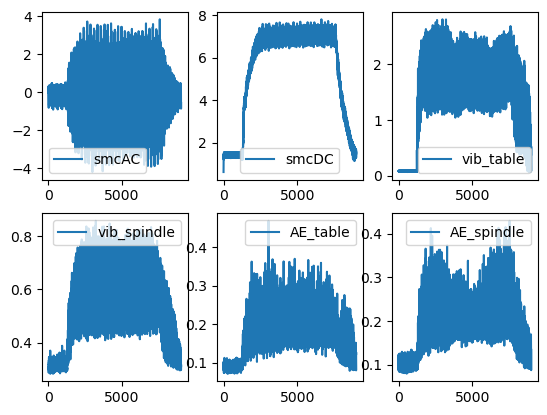

In [17]:
plt.subplot(2,3,1)
plt.plot(mill_data[0,0]["smcAC"],label="smcAC")
plt.legend()

plt.subplot(2,3,2)
plt.plot(mill_data[0,0]["smcDC"],label="smcDC")
plt.legend()

plt.subplot(2,3,3)
plt.plot(mill_data[0,0]["vib_table"],label="vib_table")
plt.legend()

plt.subplot(2,3,4)
plt.plot(mill_data[0,0]["vib_spindle"],label="vib_spindle")
plt.legend()

plt.subplot(2,3,5)
plt.plot(mill_data[0,0]["AE_table"],label="AE_table")
plt.legend()

plt.subplot(2,3,6)
plt.plot(mill_data[0,0]["AE_spindle"],label="AE_spindle")
plt.legend()


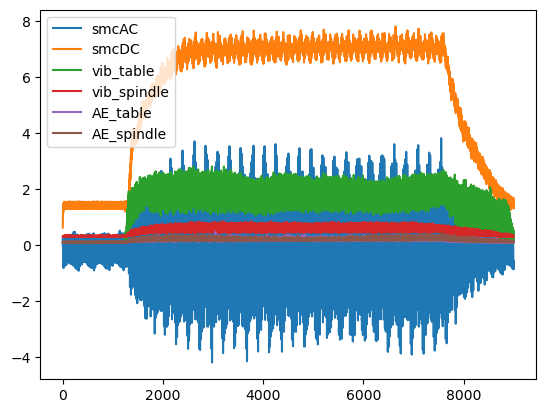

In [18]:

fig, ax = plt.subplots()

ax.plot(mill_data[0,0]['smcAC'], label='smcAC')
ax.plot(mill_data[0,0]['smcDC'], label='smcDC')
ax.plot(mill_data[0,0]['vib_table'], label='vib_table')
ax.plot(mill_data[0,0]['vib_spindle'], label='vib_spindle')
ax.plot(mill_data[0,0]['AE_table'], label='AE_table')
ax.plot(mill_data[0,0]['AE_spindle'], label='AE_spindle')

plt.legend()

### Plot for first five experimental runs

In [19]:
for iteration in range(5):
    fig, ax = plt.subplots()

    ax.plot(mill_data[0,iteration]['smcAC'], label='smcAC')
    ax.plot(mill_data[0,iteration]['smcDC'], label='smcDC')
    ax.plot(mill_data[0,iteration]['vib_table'], label='vib_table')
    ax.plot(mill_data[0,iteration]['vib_spindle'], label='vib_spindle')
    ax.plot(mill_data[0,iteration]['AE_table'], label='AE_table')
    ax.plot(mill_data[0,iteration]['AE_spindle'], label='AE_spindle')

    plt.legend()
    plt.savefig(f"plot_{iteration}.png")
    plt.close()

##### As such no anomalus condition is detected in fist five experimental runs.

### Plot for all experimental runs

KeyboardInterrupt: 

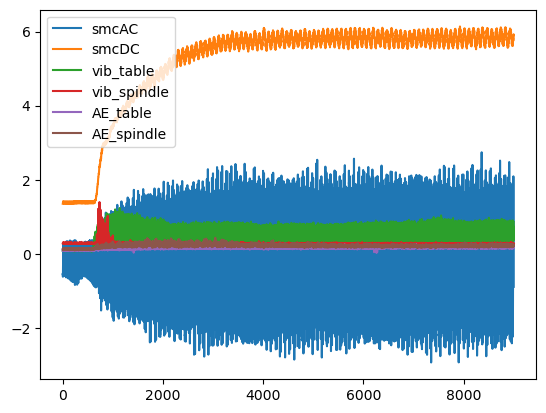

In [20]:
for iteration in range(167):
    fig, ax = plt.subplots()

    ax.plot(mill_data[0,iteration]['smcAC'], label='smcAC')
    ax.plot(mill_data[0,iteration]['smcDC'], label='smcDC')
    ax.plot(mill_data[0,iteration]['vib_table'], label='vib_table')
    ax.plot(mill_data[0,iteration]['vib_spindle'], label='vib_spindle')
    ax.plot(mill_data[0,iteration]['AE_table'], label='AE_table')
    ax.plot(mill_data[0,iteration]['AE_spindle'], label='AE_spindle')

    plt.legend()
    plt.savefig(f"plot_{iteration}.png")
    plt.close()

##### After generating all the plots, the anomalus condition can be observed at iteration number 17, 94 and 105

### Generating plots for VB

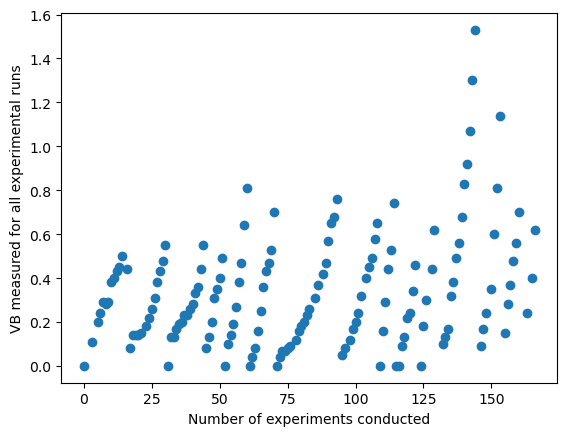

In [13]:
VB_field=fields[2]
case_field=fields[0]
VB_array=[]
case_array=[]
dict={}
for iter in range(167):
    VB_array.append(mill_data[0,iter][VB_field][0][0])
    case_array.append(mill_data[0,iter][case_field][0][0])

dict['case']=case_array
dict['VB']=VB_array


data=pd.DataFrame(dict)
plt.plot(VB_array,'o')
plt.ylabel('VB measured for all experimental runs')
plt.xlabel('Number of experiments conducted')
plt.savefig("VB_for_all_plots")

In [71]:
for iter in range(1,17):
    data_iter=data[data['case']==iter]
    plt.plot(data_iter['VB'],'o',label=f'Case {iter}')
    plt.ylabel('VB measured for all experimental runs')
    plt.xlabel('Number of experiments conducted')
    plt.legend()
    plt.savefig(f"plot_{iter}.png")
    plt.close()

### Generating plots for visualizing sensor data trends for case 1

In [14]:
sensor_fields=fields[7:13]

run_field=fields[1]
run_array=[]
for iter in range(167):
    run_array.append(mill_data[0,iter][run_field][0][0])
    
dict['run']=run_array
data=pd.DataFrame(dict)

In [15]:
data

,case,VB,run
0,1,0.00,1
1,1,NaN,2
2,1,NaN,3
3,1,0.11,4
4,1,NaN,5
...,...,...,...
162,16,NaN,2
163,16,0.24,3
164,16,NaN,4
165,16,0.40,5


In [17]:
num_runs_case1=data[data['case']==1]['run']
indexes_case1=data[data['case']==1].index

In [15]:

for sensor in sensor_fields:
    fig, ax = plt.subplots()
    count=0
    for index in indexes_case1:
        count=count+1
        ax.plot(mill_data[0,index][sensor], label=f"{sensor} Run {count}")
        plt.legend()
    
    plt.savefig(f"plot_case 1_{sensor}.png")
    plt.close()
    


### Generating plots for visualizing sensor data trends for case 13

In [16]:
num_runs_case13=data[data['case']==13]['run']
indexes_case13=data[data['case']==13].index

In [16]:

for sensor in sensor_fields:
    fig, ax = plt.subplots()
    count=0
    for index in indexes_case13:
        count=count+1
        ax.plot(mill_data[0,index][sensor], label=f"{sensor} Run {count}")
        plt.legend()
    
    plt.savefig(f"plot_case 13_{sensor}.png")
    plt.close()


In [18]:
indexes_case13

Int64Index([130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
            143, 144],
           dtype='int64')

In [19]:
indexes_case1

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

### Feature Extraction

In [20]:
features_dict={}
case1_dict={}
case13_dict={}

In [21]:
#taking the vibration data of first experimental run from case study 1
#taking first index from indexes_case1 list
vib_table_case1_run1=mill_data[0,indexes_case1[0]]['vib_table']  
vib_spindle_case1_run1=mill_data[0,indexes_case1[0]]['vib_spindle']

In [22]:
print(vib_table_case1_run1.shape)
vib_table_case1_run1_array=vib_table_case1_run1.flatten()
print(vib_table_case1_run1_array.shape)

(9000, 1)
(9000,)


In [23]:
#calculate time domain features
case1_dict['mean']=np.mean(vib_table_case1_run1_array)
case1_dict['std_dev']=np.std(vib_table_case1_run1_array)
case1_dict['kurt']=kurtosis(vib_table_case1_run1_array)
case1_dict['skewness']=skew(vib_table_case1_run1_array)
case1_dict['rms']=np.sqrt(np.mean(vib_table_case1_run1_array**2))
case1_dict['peak_to_peak']=np.max(vib_table_case1_run1_array)-np.min(vib_table_case1_run1_array)
case1_dict['crest_factor'] = np.max(np.abs(vib_table_case1_run1_array)) / case1_dict['rms']
case1_dict['shape_factor'] = case1_dict['rms']/case1_dict['mean']
case1_dict['impulse_factor'] = (np.max(np.abs(vib_table_case1_run1_array)) / case1_dict['mean'])
case1_dict['margin_factor']=np.max(np.abs(vib_table_case1_run1_array))//(np.mean(np.sqrt(vib_table_case1_run1_array)))**2
case1_dict['energy']=np.sum(vib_table_case1_run1_array**2)

In [24]:
#calculate frequency domain features for case1_run1
import numpy as np
from scipy.signal import welch

def spectral_kurtosis(signal, fs):
    # Estimate Power Spectral Density using Welch's method
    f, Pxx = welch(signal, fs=fs, nperseg=256)  # Adjust nperseg as needed

    # Normalize the PSD
    Pxx_norm = Pxx / np.sum(Pxx)

    # Calculate the kurtosis
    spectral_kurtosis = np.sum((f - np.mean(f))**4 * Pxx_norm) / np.sum((f - np.mean(f))**2 * Pxx_norm)**2 - 3
    
    return spectral_kurtosis

# Example usage:
# Generate example signal (replace this with your signal)
signal = vib_table_case1_run1_array

# Sample rate
fs = 1000  # Hz

# Calculate spectral kurtosis
sk = spectral_kurtosis(signal, fs)
print("Spectral Kurtosis:", sk)


Spectral Kurtosis: -1.2891710967678667


In [34]:
import numpy as np
from scipy.signal import welch

def calculate_spectral_kurtosis(signal, fs, window_size, overlap):
    # Calculate number of samples per window
    n_samples_per_window = int(window_size * fs)

    # Calculate number of overlapping samples
    n_overlap = int(overlap * n_samples_per_window)

    # Calculate number of windows
    n_windows = int(np.ceil(len(signal) / (n_samples_per_window - n_overlap)))

    spectral_kurtosis_values = []

    for i in range(n_windows):
        # Extract current window of the signal
        start_idx = i * (n_samples_per_window - n_overlap)
        end_idx = min(start_idx + n_samples_per_window, len(signal))
        windowed_signal = signal[start_idx:end_idx]

        # Estimate Power Spectral Density using Welch's method for the current window
        f, Pxx = welch(windowed_signal, fs=fs, nperseg=min(len(windowed_signal), 256))  # Adjust nperseg as needed

        # Normalize the PSD
        Pxx_norm = Pxx / np.sum(Pxx)

        # Calculate the mean frequency
        mean_frequency = np.sum(f * Pxx_norm)

        # Calculate the spectral kurtosis
        numerator = np.sum((f - mean_frequency) ** 4 * Pxx_norm)
        denominator = np.sum((f - mean_frequency) ** 2 * Pxx_norm)
        spectral_kurtosis = numerator / denominator - 3

        #print(spectral_kurtosis)

        spectral_kurtosis_values.append(spectral_kurtosis)

    return spectral_kurtosis_values

# Example usage:
# Generate example signal (replace this with your signal)
signal = vib_table_case1_run1_array

# Sample rate
fs = 1  # Hz

# Window parameters
window_size = 900  # in seconds
overlap = 0.5  # overlap as a fraction of window size (e.g., 50% overlap)

# Calculate spectral kurtosis for each window
sk_values = calculate_spectral_kurtosis(signal, fs, window_size, overlap)
#print("Spectral Kurtosis values for each window:", sk_values)
print(len(sk_values))


20


In [27]:
#taking the vibration data of first experimental run from case study 13
#taking first index from indexes_case13 list
vib_table_case13_run1=mill_data[0,indexes_case13[0]]['vib_table']
vib_spindle_case13_run1=mill_data[0,indexes_case13[0]]['vib_spindle']

In [29]:
vib_table_case13_run1_array=vib_table_case13_run1.flatten()

In [40]:
case13_dict['mean']=np.mean(vib_table_case13_run1_array)
case13_dict['std_dev']=np.std(vib_table_case13_run1_array)
case13_dict['kurt']=kurtosis(vib_table_case13_run1_array)
case13_dict['skewness']=skew(vib_table_case13_run1_array)
case13_dict['rms']=np.sqrt(np.mean(vib_table_case13_run1_array**2))
case13_dict['peak_to_peak']=np.max(vib_table_case13_run1_array)-np.min(vib_table_case13_run1_array)
case13_dict['crest_factor'] = np.max(np.abs(vib_table_case13_run1_array)) /case13_dict['rms']
case13_dict['shape_factor'] = case13_dict['rms']/case13_dict['mean']
case13_dict['impulse_factor'] = (np.max(np.abs(vib_table_case13_run1_array)) / case13_dict['mean'])
case13_dict['margin_factor']=np.max(np.abs(vib_table_case13_run1_array))//(np.mean(np.sqrt(vib_table_case13_run1_array)))**2
case13_dict['energy']=np.sum(vib_table_case13_run1_array**2)

In [41]:
#calculate frequency domain features for case13_run1

In [38]:
features_dict={'case1_features':case1_dict, 'case13_features':case13_dict}
features_data=pd.DataFrame(features_dict)
features_data

,case1_features,case13_features
mean,1.612179,0.598298
std_dev,0.777077,0.325018
kurt,-0.311271,-0.200030
skewness,-1.076321,0.014389
rms,1.789685,0.680880
peak_to_peak,2.749023,1.784668
crest_factor,1.571506,2.689248
shape_factor,1.110103,1.138028
impulse_factor,1.744533,3.060439
margin_factor,1.000000,3.000000
